## for iphone

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import spacy

In [2]:
iphone = pd.read_json('reddit_iphone.json')

In [3]:
iphone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    9815 non-null   object
 1   Upvotes  9815 non-null   int64 
 2   URL      9815 non-null   object
 3   Created  9815 non-null   int64 
 4   Text     9815 non-null   object
dtypes: int64(2), object(3)
memory usage: 383.5+ KB


In [4]:
iphone = iphone.drop_duplicates()

In [5]:
iphone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1562 non-null   object
 1   Upvotes  1562 non-null   int64 
 2   URL      1562 non-null   object
 3   Created  1562 non-null   int64 
 4   Text     1562 non-null   object
dtypes: int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
# Perform sentiment analysis using TextBlob (or another sentiment model like VADER)
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [7]:
iphone['sentiment'] = iphone['Text'].apply(get_sentiment)

In [8]:
iphone['sentiment'].value_counts()

sentiment
 0.000000    443
 0.250000     16
 0.050000     16
 0.200000     16
-0.071429     14
            ... 
 0.084091      1
 0.125909      1
 0.008333      1
-0.431818      1
-0.152041      1
Name: count, Length: 543, dtype: int64

In [9]:
nlp = spacy.load("en_core_web_sm")

In [10]:
def extract_location(text):
    doc = nlp(text)
    locations = [ent.text for ent in doc.ents if ent.label_ == "GPE"]  # GPE stands for Geopolitical Entity (cities, countries)
    return locations[0] if locations else None  # Return the first location found or None

In [11]:
iphone['location'] = iphone['Text'].apply(extract_location)

In [12]:
iphone['location'].value_counts()

location
US                                                                                                                                                                                            11
Spotify                                                                                                                                                                                       10
AI                                                                                                                                                                                             8
n’t                                                                                                                                                                                            8
London                                                                                                                                                                                         6
UK                        

In [13]:
iphone['location'].unique()

array([None, 'Siri', 'BT', 'Verizon', 'USA', 'India', 'n’t', 'london',
       'Delete', 'China', 'Germany', 'London', 'Spotify', 'US',
       'United States', 'iTunes', 'Photos', 'Unpacked', 'Aparece',
       'Pakistan', 'Reddit', 'india', 'Canada', 'France',
       'Windows lo rechaza', 'Macbook', 'el único', 'Australia',
       'Santa Clarita', 'Us', 'Island', 'UK', 'Romania', 'Georgia',
       'Cupertino', 'Rhinoshield', 'Singapore', 'Ugreen', 'GB', '0.5x',
       'UAE', 'fica', 'Israel', 'Egypt', 'AI', 'Andriod', 'Banglore',
       'MACBOOK', 'Prague', 'russia', 'Game Center', 'nada', 'TOTALLY',
       'Philippines',
       'https://www.reddit.com/r/iphone/comments/18sdva9/cant_delete_vpn_app_off_my_phone_even_though_i/?utm_source=share&utm_medium=mweb3x&utm_name=mweb3xcss&utm_term=1&utm_content=share_button',
       'Hakuba', 'Continue'], dtype=object)

In [14]:
import pycountry

In [15]:
valid_countries = {country.name.lower(): country.name for country in pycountry.countries}

In [16]:
valid_countries

{'aruba': 'Aruba',
 'afghanistan': 'Afghanistan',
 'angola': 'Angola',
 'anguilla': 'Anguilla',
 'åland islands': 'Åland Islands',
 'albania': 'Albania',
 'andorra': 'Andorra',
 'united arab emirates': 'United Arab Emirates',
 'argentina': 'Argentina',
 'armenia': 'Armenia',
 'american samoa': 'American Samoa',
 'antarctica': 'Antarctica',
 'french southern territories': 'French Southern Territories',
 'antigua and barbuda': 'Antigua and Barbuda',
 'australia': 'Australia',
 'austria': 'Austria',
 'azerbaijan': 'Azerbaijan',
 'burundi': 'Burundi',
 'belgium': 'Belgium',
 'benin': 'Benin',
 'bonaire, sint eustatius and saba': 'Bonaire, Sint Eustatius and Saba',
 'burkina faso': 'Burkina Faso',
 'bangladesh': 'Bangladesh',
 'bulgaria': 'Bulgaria',
 'bahrain': 'Bahrain',
 'bahamas': 'Bahamas',
 'bosnia and herzegovina': 'Bosnia and Herzegovina',
 'saint barthélemy': 'Saint Barthélemy',
 'belarus': 'Belarus',
 'belize': 'Belize',
 'bermuda': 'Bermuda',
 'bolivia, plurinational state of': '

In [17]:
def extract_valid_country(location):
    if location is not None and location.lower() in valid_countries:
        return valid_countries[location.lower()]
    return None  # If it's not a valid country, return None

In [18]:
iphone['country'] = iphone['location'].apply(extract_valid_country)

In [19]:
iphone['country']

0       None
1       None
2       None
3       None
4       None
        ... 
9548    None
9575    None
9601    None
9689    None
9703    None
Name: country, Length: 1562, dtype: object

In [20]:
iphone = iphone[iphone['country'].notna()]

In [21]:
iphone['country']

45              India
92              China
95            Germany
137     United States
253           Germany
265          Pakistan
301             India
339            Canada
360            France
386             China
392             India
425         Australia
495           Romania
504           Georgia
509            Canada
547         Singapore
633            Israel
670             Egypt
827            Canada
939       Philippines
1247         Pakistan
2229         Pakistan
Name: country, dtype: object

In [22]:
location_sentiment = iphone.groupby('country')['sentiment'].mean().reset_index()

In [23]:
location_sentiment

,country,sentiment
0,Australia,0.068182
1,Canada,-0.024401
2,China,-0.005303
3,Egypt,0.111111
4,France,0.012500
5,Georgia,-0.060606
6,Germany,0.113750
7,India,0.263997
8,Israel,0.101189
9,Pakistan,0.000000


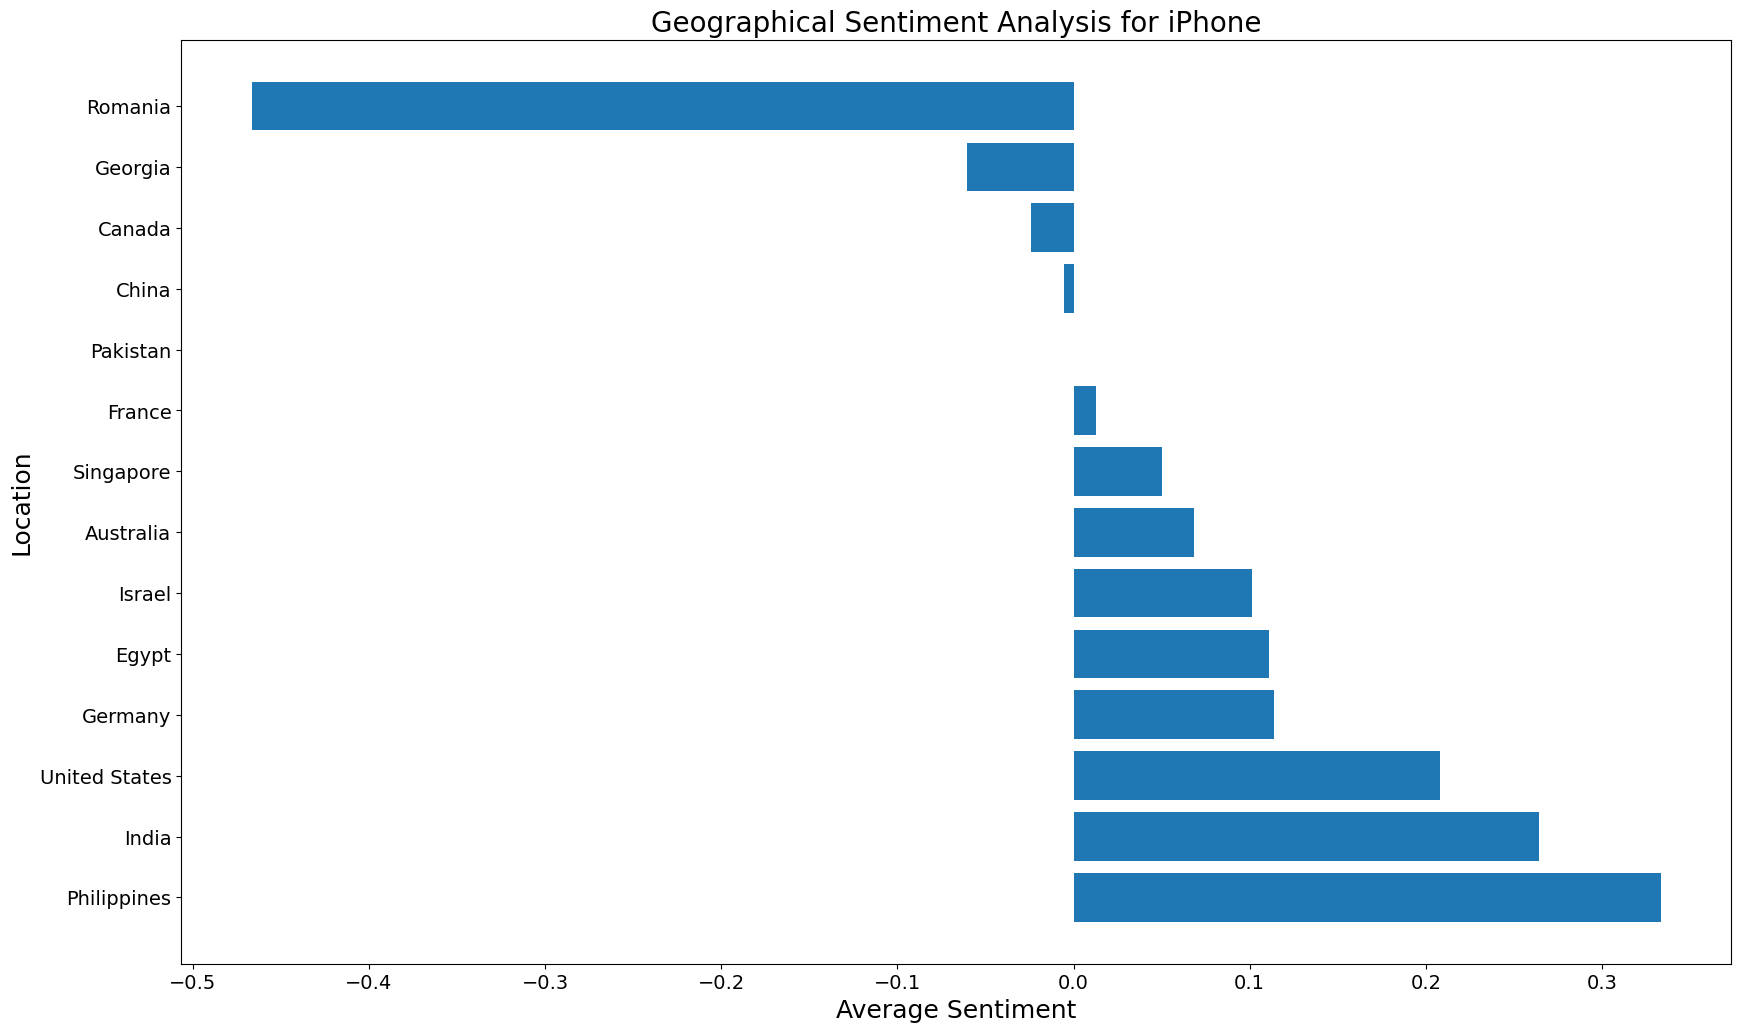

In [78]:
plt.figure(figsize=(20, 12))  # Increased the figure size for better visibility
location_sentiment.sort_values('sentiment', ascending=False, inplace=True)

# Plotting the horizontal bar chart
plt.barh(location_sentiment['country'], location_sentiment['sentiment'])

# Labels and title with larger font sizes
plt.xlabel('Average Sentiment', fontsize=18)
plt.ylabel('Location', fontsize=18)
plt.title('Geographical Sentiment Analysis for iPhone', fontsize=20)

plt.xticks(fontsize=14)  # Adjusting font size for sentiment values (x-axis)
plt.yticks(fontsize=14)  # Adjusting font size for country names (y-axis)

# Show the plot
plt.show()

# for samsung

In [25]:
samsung = pd.read_json('reddit_samsung.json')

In [26]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9490 entries, 0 to 9489
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    9490 non-null   object
 1   Upvotes  9490 non-null   int64 
 2   URL      9490 non-null   object
 3   Created  9490 non-null   int64 
 4   Text     9490 non-null   object
dtypes: int64(2), object(3)
memory usage: 370.8+ KB


In [27]:
samsung = samsung.drop_duplicates()

In [28]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1862 entries, 0 to 9444
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1862 non-null   object
 1   Upvotes  1862 non-null   int64 
 2   URL      1862 non-null   object
 3   Created  1862 non-null   int64 
 4   Text     1862 non-null   object
dtypes: int64(2), object(3)
memory usage: 87.3+ KB


In [29]:
samsung['sentiment'] = samsung['Text'].apply(get_sentiment)

In [30]:
samsung['sentiment'].value_counts()

sentiment
 0.000000    248
 0.500000     42
 0.095248     31
 0.200000     21
 0.100000     17
            ... 
 0.375000      1
 0.037577      1
-0.135000      1
 0.316667      1
 0.121188      1
Name: count, Length: 618, dtype: int64

In [31]:
samsung['location'] = samsung['Text'].apply(extract_location)

In [32]:
samsung['location'].value_counts()

location
S24        69
AI         38
US         26
S25U       14
Canada     11
           ..
New S24     1
Youtube     1
A20         1
UN1CA       1
YouTube     1
Name: count, Length: 77, dtype: int64

In [33]:
samsung['location'].unique()

array([None, 'S24', 'korea', 'S25U', 'Crinicle', 'MKBHD', 'canada',
       'India', 'AI', 'UK', 'Nicaragua', 'china', 'US', 'USA', 'Steam',
       'Canada', 'india', 'N20U', 'Tizen', 'netflix', 'Germany',
       'Florida', 'Gboard', 'Galaxy', 'A73', 'Reddit', 'kinda', 'oneui6',
       'Greentoe', 'Vodafone Ireland', 'n’t', 'Anker', 'Cheapo', 'GB',
       'Netflix', 'Q60D', 'SF', 'Norway', 'Mobile', 'Manitoba', 'EQ',
       'uk', 'New S24', 'Youtube', '🖊', 'Chritmas', 'A20', 'P.S.', 's6',
       'UN1CA', 'Chipsets', 'Gemini', "SHOULDN'T", 'Bixby', 'Texas',
       ':))', 'Exynos', 'Edge', 'Peru', 'Bandori', 'TT', '9/1/2023',
       'FedEx', 'Costa Rica', 'VA', 'M13', 'LG', 'ZERO', 'Us', 'Siri',
       'Whatsapp', 'BT', 'Fold(I', 'Japan', 'Hubbys', 'Discord', 'PiP',
       'YouTube'], dtype=object)

In [34]:
samsung['country'] = samsung['location'].apply(extract_valid_country)

In [35]:
samsung['country']

0       None
1       None
2       None
3       None
4       None
        ... 
9375    None
9413    None
9420    None
9429    None
9444    None
Name: country, Length: 1862, dtype: object

In [36]:
samsung = samsung[samsung['country'].notna()]

In [37]:
samsung['country']

44          Canada
52           India
78       Nicaragua
85           China
114         Canada
130          India
166        Germany
177         Canada
364         Norway
421         Canada
517          India
616          India
627          India
636         Canada
689           Peru
743     Costa Rica
844          India
862          Japan
877         Canada
945          India
1027     Nicaragua
1034         China
1126        Canada
1370        Canada
1585        Canada
1638          Peru
1894         India
1976     Nicaragua
1983         China
2064       Germany
2075        Canada
2319        Canada
2534        Canada
2641    Costa Rica
2925     Nicaragua
3013       Germany
3536          Peru
3874     Nicaragua
4217        Canada
4485          Peru
5381        Canada
5690         India
6115        Canada
6437    Costa Rica
Name: country, dtype: object

In [38]:
location_samsung = samsung.groupby('country')['sentiment'].mean().reset_index()

In [39]:
location_samsung

,country,sentiment
0,Canada,0.126760
1,China,0.108333
2,Costa Rica,-0.060768
3,Germany,0.122884
4,India,0.149873
5,Japan,0.250000
6,Nicaragua,0.044478
7,Norway,0.119444
8,Peru,0.100394


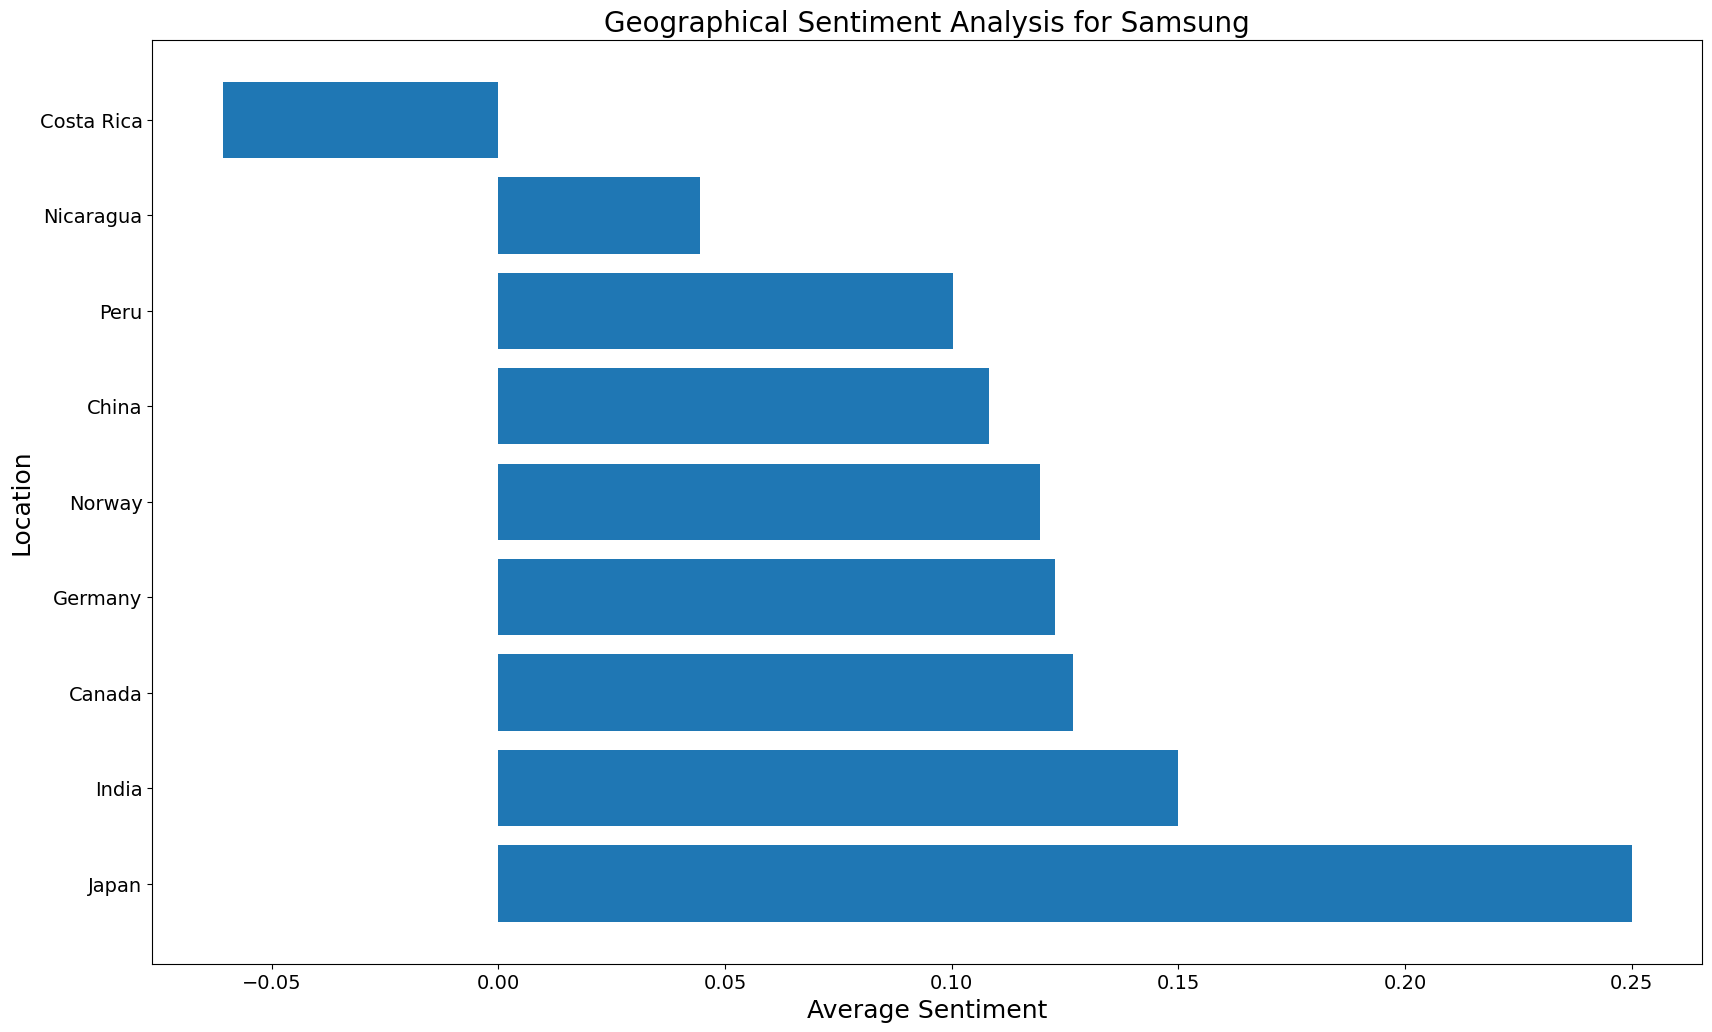

In [77]:
plt.figure(figsize=(20, 12))  # A more reasonable size for the plot
location_samsung.sort_values('sentiment', ascending=False, inplace=True)

# Create the horizontal bar plot
plt.barh(location_samsung['country'], location_samsung['sentiment'])

# Labels and title with larger font sizes for better readability
plt.xlabel('Average Sentiment', fontsize=18)
plt.ylabel('Location', fontsize=18)
plt.title('Geographical Sentiment Analysis for Samsung', fontsize=20)

plt.xticks(fontsize=14)  # Adjusting font size for sentiment values (x-axis)
plt.yticks(fontsize=14)  # Adjusting font size for country names (y-axis)

# Display the plot
plt.show()

# for xiaomi

In [41]:
xiaomi = pd.read_json("reddit_xiaomi.json")

In [42]:
xiaomi

,Title,Upvotes,URL,Created,Text
0,How to reduce spacing between icons in a folder,2,https://www.reddit.com/r/Xiaomi/comments/1hyt7...,1736591477,I just acquired a device with hyper os 2 and I...
1,Are you disappointed from Xiaomi Redmi Note 14...,6,https://www.reddit.com/r/Xiaomi/comments/1hysw...,1736590096,Did the Global versions of these devices disap...
2,Xiaomi Scooter 4 lite 2nd gen,1,https://www.reddit.com/r/Xiaomi/comments/1hysf...,1736588006,"Hi all,\n\nI received the Xiaomi scooter 4 lit..."
3,Xiaomi Smart Speaker (IR)- Not connecting to M...,1,https://www.reddit.com/r/Xiaomi/comments/1hys8...,1736587093,"Hi everyone,\n\nI recently got the Xiaomi Smar..."
4,Who switched from Samsung S24 Ultra to Xiaomi ...,1,https://www.reddit.com/r/Xiaomi/comments/1hyr5...,1736582173,I would like to hear the impressions. Generall...
...,...,...,...,...,...
9425,Mi9T No Scan app,1,https://www.reddit.com/r/Xiaomi/comments/1gxzl...,1732368456,Mi9T\n\nMy scanning app has disappeared.\n\nWh...
9426,What is this error mean? Cordless Vacuum Cleaner,1,https://www.reddit.com/r/Xiaomi/comments/1gxwk...,1732357129,Can someone please help what this error mean? ...
9427,Using EDL mode to flash LineageOS on snapdrago...,2,https://www.reddit.com/r/Xiaomi/comments/1gxwh...,1732356770,Hello there. I have a Xiaomi Redmi Note 8T pho...
9428,Help with private folder,2,http://google.com,1732355173,For some reason i forgot the privacy protectio...


In [43]:
xiaomi = xiaomi.drop_duplicates()

In [44]:
xiaomi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1523 entries, 0 to 9298
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1523 non-null   object
 1   Upvotes  1523 non-null   int64 
 2   URL      1523 non-null   object
 3   Created  1523 non-null   int64 
 4   Text     1523 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.4+ KB


In [45]:
xiaomi['sentiment'] = xiaomi['Text'].apply(get_sentiment)

C:\Users\DELL\AppData\Local\Temp\ipykernel_288\852827905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xiaomi['sentiment'] = xiaomi['Text'].apply(get_sentiment)


In [46]:
xiaomi['sentiment'].value_counts()

sentiment
 0.000000    340
 0.200000     34
 0.250000     21
 0.100000     18
 0.166667     14
            ... 
-0.006250      1
 0.398095      1
 0.192188      1
-0.133333      1
 0.150198      1
Name: count, Length: 521, dtype: int64

In [47]:
xiaomi['location'] = xiaomi['Text'].apply(extract_location)

C:\Users\DELL\AppData\Local\Temp\ipykernel_288\3758043800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xiaomi['location'] = xiaomi['Text'].apply(extract_location)


In [48]:
xiaomi['location'].value_counts()

location
china          12
Spotify        11
Reddit         10
China           8
UK              8
               ..
new Zealand     1
Cyprus          1
Malaysia        1
Gboard          1
BT              1
Name: count, Length: 62, dtype: int64

In [49]:
xiaomi['location'].unique()

array([None, 'India', 'YT', 'china', 'UK', 'Brazil', 'Hong Kong',
       'germany', 'Cambodia', 'USA', 'F1', 'South Africa', 'italy',
       'Gemini', 'Australia', 'Philippines', 'Spotify', 'com.mojang',
       'Xiami', 'new Zealand', 'Uk', 'Cyprus', 'Italy', 'China', 'Alarm',
       'Spain', 'japan', 'Pakistan', 'Gboard', 'Malaysia', 'cba', 'AI',
       'Beijing', 'Netflix', 'YouTube', 'Xperia', 'NE', 'Tokopedia',
       'Canada', 'GB', 'US', 'india', 'Airplane', 'pro+', 'BT', 'normaly',
       'puedo', 'P.S.', 'hydrogel', 'Reddit', 'Vietnam', 'Dashlane',
       'netflix', '|:-|:-|:-|', 'HyperOS', 'Germany', 'us', 'Issue',
       'Truecaller', 'n’t', 'Macedonia', 'colombia', 'Pro+'], dtype=object)

In [50]:
xiaomi['country'] = xiaomi['location'].apply(extract_valid_country)

C:\Users\DELL\AppData\Local\Temp\ipykernel_288\1854055770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xiaomi['country'] = xiaomi['location'].apply(extract_valid_country)


In [51]:
xiaomi['country']

0        None
1       India
2        None
3        None
4        None
        ...  
9013     None
9114     None
9219     None
9280     None
9298     None
Name: country, Length: 1523, dtype: object

In [52]:
xiaomi = xiaomi[xiaomi['country'].notna()]

In [53]:
xiaomi['country']

1           India
14          China
36         Brazil
46      Hong Kong
49        Germany
          ...    
5559        China
5734     Cambodia
6512      Germany
6695        China
8931       Canada
Name: country, Length: 62, dtype: object

In [54]:
location_xiaomi = xiaomi.groupby('country')['sentiment'].mean().reset_index()

In [55]:
location_xiaomi

,country,sentiment
0,Australia,-0.014005
1,Brazil,-0.019598
2,Cambodia,0.191667
3,Canada,0.131818
4,China,0.170202
5,Colombia,0.235000
6,Cyprus,0.083333
7,Germany,0.177464
8,Hong Kong,-0.109375
9,India,0.171627


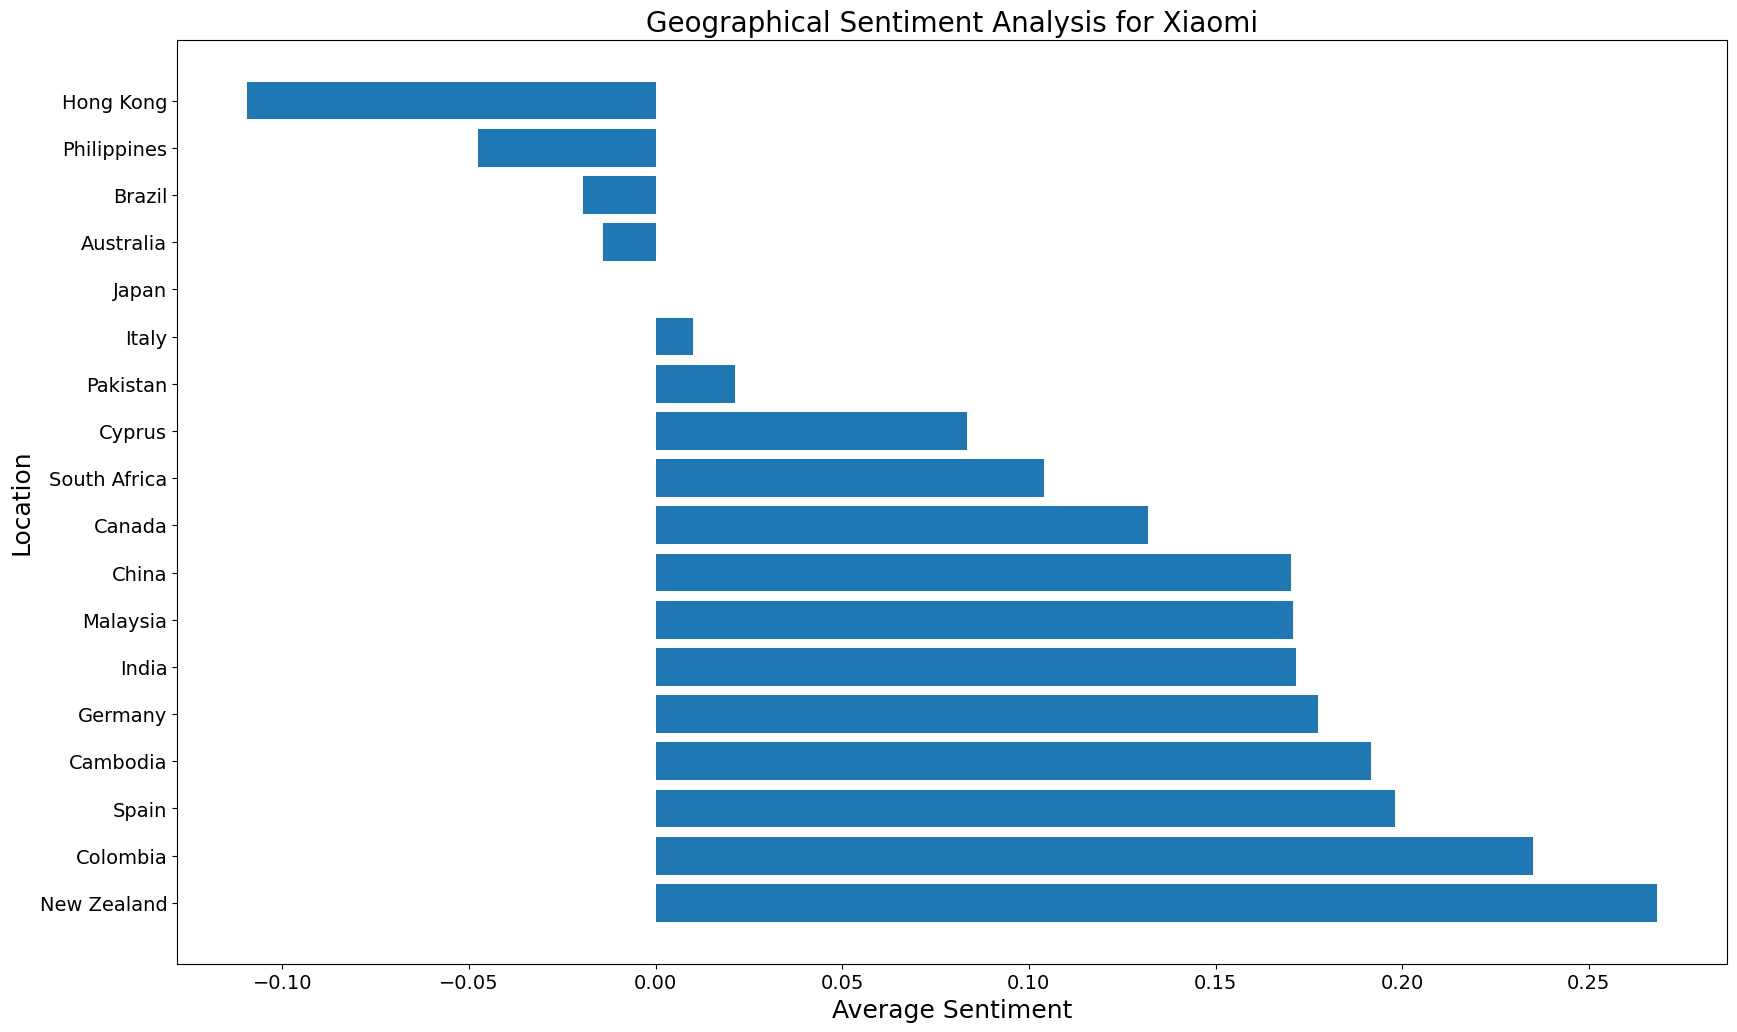

In [76]:
plt.figure(figsize=(20, 12))  # A more manageable figure size for better visibility
location_xiaomi.sort_values('sentiment', ascending=False, inplace=True)

# Create the horizontal bar plot
plt.barh(location_xiaomi['country'], location_xiaomi['sentiment'])

# Labels and title with larger font sizes for better readability
plt.xlabel('Average Sentiment', fontsize=18)
plt.ylabel('Location', fontsize=18)
plt.title('Geographical Sentiment Analysis for Xiaomi', fontsize=20)

plt.xticks(fontsize=14)  # Adjusting font size for sentiment values (x-axis)
plt.yticks(fontsize=14)  # Adjusting font size for country names (y-axis)

# Display the plot
plt.show()

## for oneplus

In [57]:
oneplus = pd.read_json("reddit_oneplus.json")

In [58]:
oneplus

,Title,Upvotes,URL,Created,Text
0,is the update policy of 1+ still bi-monthly se...,1,https://www.reddit.com/r/oneplus/comments/1hys...,1736588333,So far I understood Samsung and Pixel already ...
1,Unable to return my 13 (UK),1,https://www.reddit.com/r/oneplus/comments/1hyr...,1736585480,Is there something wrong with the website? The...
2,Reason to upgrade,2,https://www.reddit.com/r/oneplus/comments/1hyr...,1736584744,"Alright, so OP 13 is all the new hype right no..."
3,How does the Spigen case look with the blue ve...,1,https://www.reddit.com/r/oneplus/comments/1hyr...,1736584540,"If anyone is using this combo, I'd appreciate ..."
4,Facing UPI and banking issues on my OP6,1,https://www.reddit.com/r/oneplus/comments/1hyr...,1736583721,On my OP6 banking apps are not responding righ...
...,...,...,...,...,...
9853,Unable to Use Google Wallet on OnePlus 8T - Pl...,2,https://www.reddit.com/r/oneplus/comments/1hkk...,1734949429,"Hello everyone, \n \nI'm reaching out to sha..."
9854,Help with Oneplus 12! Extremely urgent!,1,https://www.reddit.com/r/oneplus/comments/1hkj...,1734943397,Im freaking the hell out because I leave for v...
9855,Do they give free screen replacement?,1,https://www.reddit.com/r/oneplus/comments/1hkj...,1734940465,My 9R got a green line today morning. I have s...
9856,Package installer doesn't let me install combi...,1,https://www.reddit.com/r/oneplus/comments/1hki...,1734939985,I have an one plus ace 3 with cn firmware. \nI...


In [59]:
oneplus = oneplus.drop_duplicates()

In [60]:
oneplus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1940 entries, 0 to 9850
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1940 non-null   object
 1   Upvotes  1940 non-null   int64 
 2   URL      1940 non-null   object
 3   Created  1940 non-null   int64 
 4   Text     1940 non-null   object
dtypes: int64(2), object(3)
memory usage: 90.9+ KB


In [61]:
oneplus['sentiment'] = oneplus['Text'].apply(get_sentiment)

C:\Users\DELL\AppData\Local\Temp\ipykernel_288\3283841834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oneplus['sentiment'] = oneplus['Text'].apply(get_sentiment)


In [62]:
oneplus['sentiment'].value_counts()

sentiment
 0.000000    604
 0.200000     29
 0.250000     24
 0.166667     22
 0.500000     18
            ... 
 0.275000      1
 0.172222      1
 0.030159      1
 0.231746      1
-0.033144      1
Name: count, Length: 550, dtype: int64

In [63]:
oneplus['location'] = oneplus['Text'].apply(extract_location)

C:\Users\DELL\AppData\Local\Temp\ipykernel_288\293404174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oneplus['location'] = oneplus['Text'].apply(extract_location)


In [64]:
oneplus['location'].value_counts()

location
US                                                                                                                       34
China                                                                                                                    23
India                                                                                                                    20
AI                                                                                                                       14
UK                                                                                                                       14
                                                                                                                         ..
Israel                                                                                                                    1
https://preview.redd.it/98tjvr6boqbe1.jpg?width=3072&format=pjpg&auto=webp&s=a927a4dca452e59fffdf26a15dd590fcf48b4655     1

In [65]:
oneplus['location'].unique()

array([None, 'AI', 'US', 'Philippines', 'MagSafe', 'Canada', 'YouTube',
       'Verizon', 'Tradingshenzhen', 'london', 'Oppo', 'India', 'Romania',
       'NZ', 'AIRVOOC', 'States', 'USA', 'Kinda', 'China', 'Arcadia',
       'Mouse', 'eu',
       'https://preview.redd.it/98tjvr6boqbe1.jpg?width=3072&format=pjpg&auto=webp&s=a927a4dca452e59fffdf26a15dd590fcf48b4655',
       'EU', 'America', 'UK', 'Austria', 'Black', 'U.S', 'Norway',
       'Spotify', 'Israel', 'china', '~70%', 'Belgium', 'Shelf', 'UC',
       '144hz', 'Clicky', 'United States', 'Germany', 'Activities',
       'cambodia', 'Australia', 'Criteria', 'GB', 'OOS15', 'Photos',
       'S24', 'india', 'netflix', 'Shenzhen', 'Boston', 'Italy', 'Texas',
       'N30', 'Oman', 'Gecko', 'U.S.', 'California', 'Amsterdam',
       'KB2003\\_14.0.0.301', 'Singapore'], dtype=object)

In [66]:
oneplus['country'] = oneplus['location'].apply(extract_valid_country)

C:\Users\DELL\AppData\Local\Temp\ipykernel_288\1367692555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oneplus['country'] = oneplus['location'].apply(extract_valid_country)


In [67]:
oneplus['country']

0       None
1       None
2       None
3       None
4       None
        ... 
9722    None
9731    None
9810    None
9829    None
9850    None
Name: country, Length: 1940, dtype: object

In [68]:
oneplus = oneplus[oneplus['country'].notna()]

In [69]:
oneplus['country']

13      Philippines
24           Canada
85            India
92          Romania
148           China
           ...     
6271        Romania
6433          India
6672          China
8035          China
8297          China
Name: country, Length: 85, dtype: object

In [70]:
location_oneplus = oneplus.groupby('country')['sentiment'].mean().reset_index()

In [71]:
location_oneplus

,country,sentiment
0,Australia,0.083333
1,Austria,0.225000
2,Belgium,0.185440
3,Cambodia,-0.291667
4,Canada,0.095522
5,China,0.073858
6,Germany,-0.060000
7,India,0.064206
8,Israel,0.145455
9,Italy,-0.275000


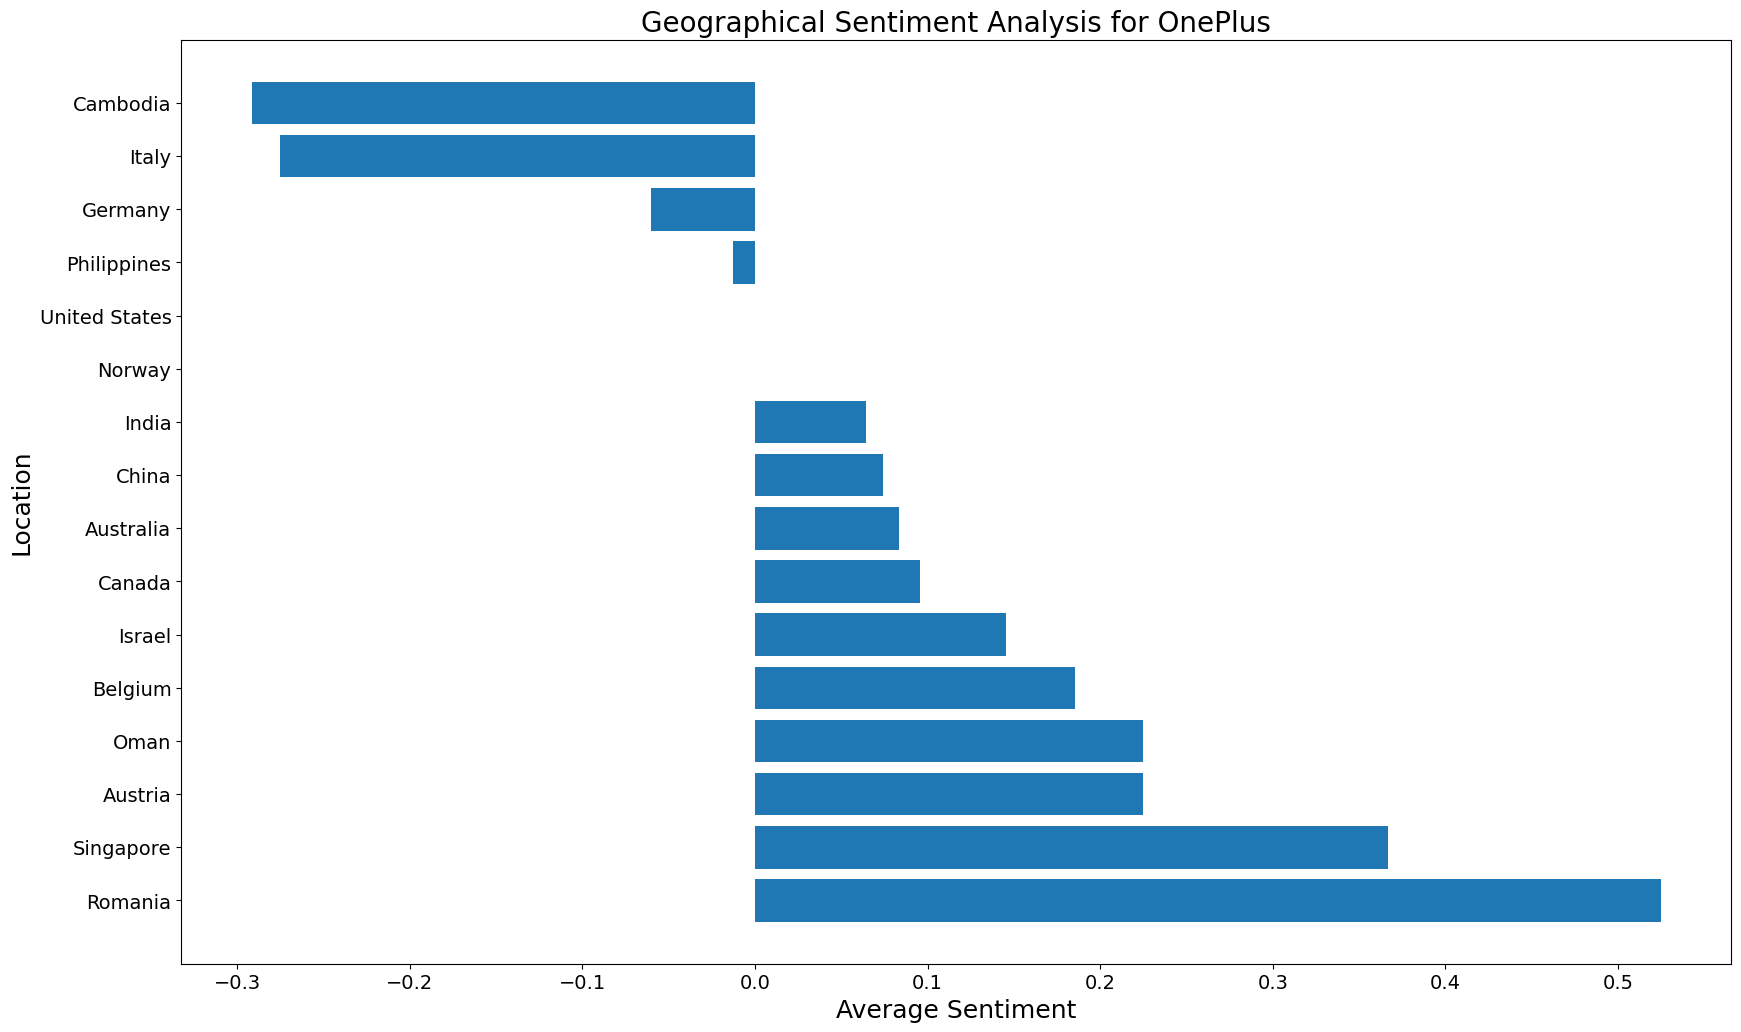

In [75]:
plt.figure(figsize=(20, 12))  # A more balanced figure size for better visibility
location_oneplus.sort_values('sentiment', ascending=False, inplace=True)

# Create the horizontal bar plot
plt.barh(location_oneplus['country'], location_oneplus['sentiment'])

# Set labels and title with larger font sizes
plt.xlabel('Average Sentiment', fontsize=18)
plt.ylabel('Location', fontsize=18)
plt.title('Geographical Sentiment Analysis for OnePlus', fontsize=20)

plt.xticks(fontsize=14)  # Adjusting font size for sentiment values (x-axis)
plt.yticks(fontsize=14)  # Adjusting font size for country names (y-axis)

# Display the plot
plt.show()

In [73]:
## so till now we have done the Geographical sentiment analysis of each smartphone data.